In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Update this path based on your extracted file location
file_path = "/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0               3268       112740690                  32   
1                389       112740560                  32   
2                  0       113757377                 545   
3               5355          100126                  22   
4                  0           54760                   4   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       16                         6448   
1                       16                         6448   
2                        0                            0   
3                        0                          616   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          1152                     403   
1                          5056                     403   
2                             0                       0   
3                             0                 

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 6888


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (184145, 79)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 28


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values are removed
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after removal: {missing_values_after}")


Total missing values after removal: 0


Highly correlated feature pairs (>|0.9| correlation):
(' Flow Duration', 'Fwd IAT Total')
(' Flow Duration', 'Bwd IAT Total')
(' Total Fwd Packets', ' Total Backward Packets')
(' Total Fwd Packets', ' Total Length of Bwd Packets')
(' Total Fwd Packets', ' Fwd Header Length')
(' Total Fwd Packets', ' Bwd Header Length')
(' Total Fwd Packets', ' Fwd Header Length.1')
(' Total Fwd Packets', 'Subflow Fwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Bytes')
(' Total Fwd Packets', ' act_data_pkt_fwd')
(' Total Backward Packets', ' Total Length of Bwd Packets')
(' Total Backward Packets', ' Fwd Header Length')
(' Total Backward Packets', ' Bwd Header Length')
(' Total Backward Packets', ' Fwd Header Length.1')
(' Total Backward Packets', 'Subflow Fwd Packets')
(' Total Backward Packets', ' Subflow Bwd Packets')
(' Total Backward Packets', ' Subflow Bwd Bytes')
(' Total Backward Packets', ' act_data_pkt_fwd')
('Total Length of Fwd Packets', ' Su

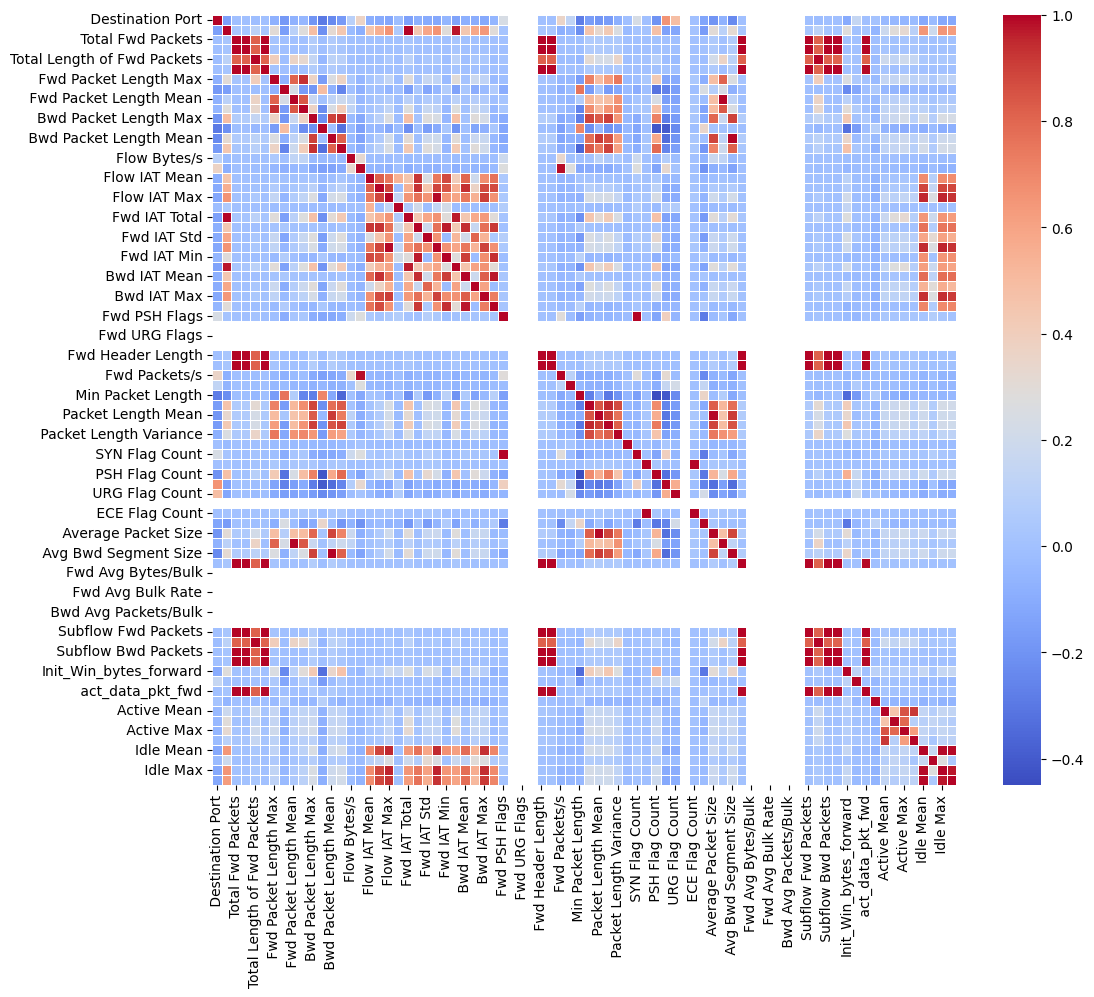

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold (e.g., 0.9)
threshold = 0.9

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated feature pairs (>|0.9| correlation):")
for pair in high_corr_pairs:
    print(pair)

plt.show()


Dropping 30 highly correlated features:
{' Fwd Packet Length Std', ' Fwd IAT Max', 'Bwd IAT Total', ' Subflow Bwd Bytes', ' SYN Flag Count', ' ECE Flag Count', ' Bwd Header Length', ' Bwd IAT Min', ' Bwd Packet Length Std', ' Active Min', ' Packet Length Std', ' Subflow Fwd Bytes', ' act_data_pkt_fwd', ' Avg Bwd Segment Size', ' Idle Max', ' Fwd IAT Mean', ' Bwd IAT Max', ' Fwd Header Length', 'Fwd IAT Total', ' Subflow Bwd Packets', ' Packet Length Mean', ' Fwd Header Length.1', ' Idle Min', ' Total Length of Bwd Packets', ' Avg Fwd Segment Size', 'Idle Mean', ' Total Backward Packets', 'Fwd Packets/s', ' Bwd IAT Mean', 'Subflow Fwd Packets'}


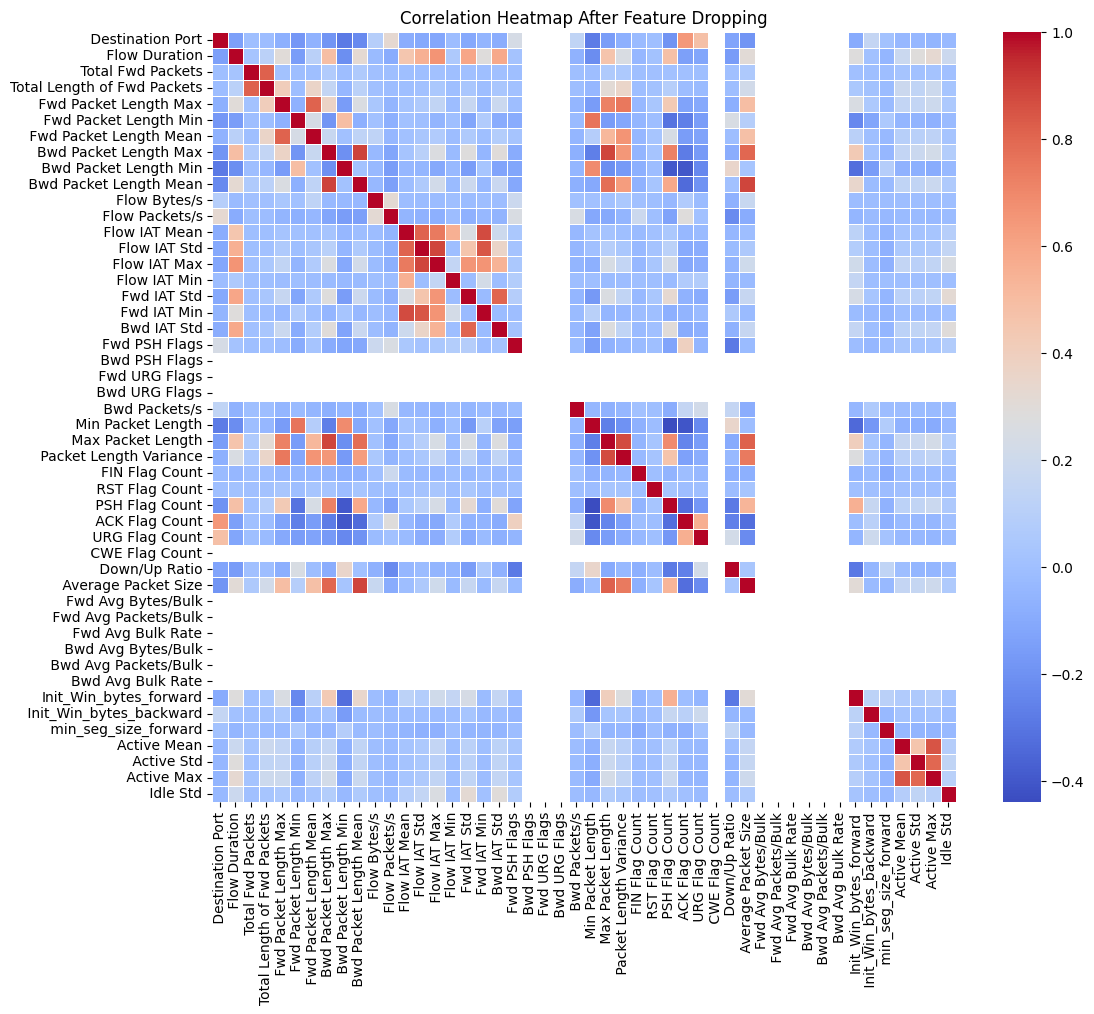

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure you use the cleaned dataset)
df = pd.read_csv("/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")  # Change to your actual dataset

# Select numerical columns only
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Set a correlation threshold
threshold = 0.9

# Find highly correlated feature pairs
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Automatically select features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop one of the correlated features

print(f"Dropping {len(features_to_drop)} highly correlated features:")
print(features_to_drop)

# Drop the selected features
df_cleaned = df.drop(columns=features_to_drop, errors='ignore')

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Verify with a new correlation heatmap
# Compute correlation matrix using only numeric columns
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Verify with a new correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Dropping")
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    28
dtype: int64


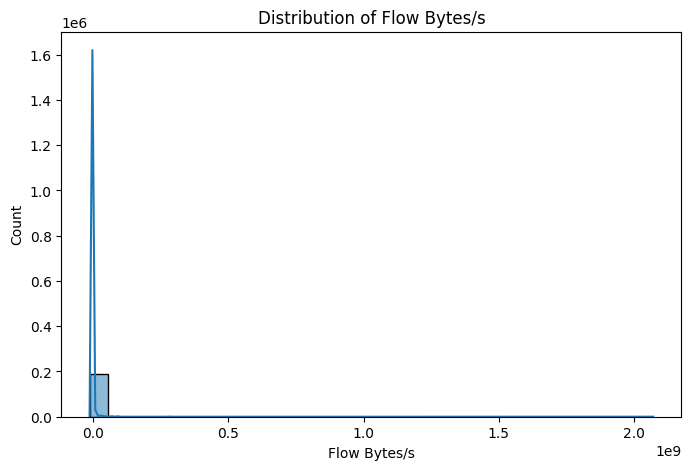

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()


In [ ]:
df_cleaned = df_cleaned.copy()  # Ensures we modify the actual DataFrame

# Replace inf values with NaN first
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with the 99th percentile of valid values
finite_max = df_cleaned['Flow Bytes/s'].quantile(0.99)
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(finite_max)


In [ ]:
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].median())



In [ ]:
df_cleaned['Flow Bytes/s'] = np.log1p(df_cleaned['Flow Bytes/s'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


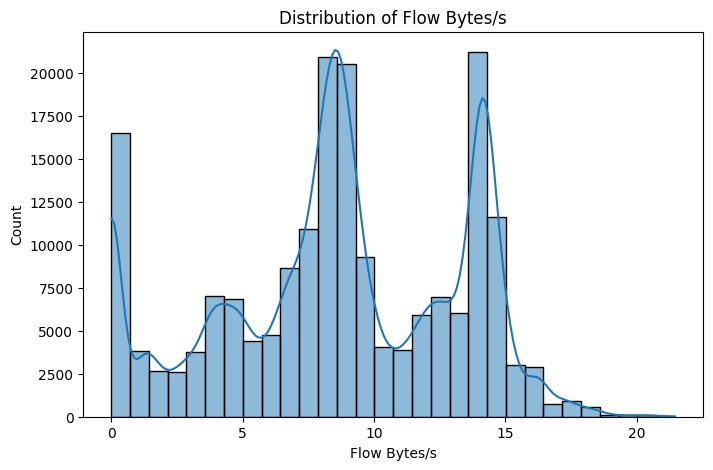

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()

In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    8
dtype: int64


In [ ]:


# Now check unique labels
print(df[' Label'].unique())

['BENIGN' 'Bot']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned[' Label'] = label_encoder.fit_transform(df_cleaned[' Label'])  # Convert to 0 and 1


In [ ]:
print(df_cleaned[' Label'].unique())


[0 1]


In [ ]:
import numpy as np

# Check for infinite values
print(np.isinf(df_cleaned).sum())



 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
Total Length of Fwd Packets      0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
Flow Bytes/s                     0
 Flow Packets/s                122
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
 Fwd IAT Std                     0
 Fwd IAT Min                     0
 Bwd IAT Std                     0
Fwd PSH Flags                    0
 Bwd PSH Flags                   0
 Fwd URG Flags                   0
 Bwd URG Flags                   0
 Bwd Packets/s                   0
 Min Packet Length               0
 Max Packet Length               0
 Packet Length Variance          0
FIN Flag Count                   0
 RST Flag Count     

In [ ]:
df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


<ipython-input-20-98b65e27ec3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


In [ ]:
print(np.isinf(df_cleaned).sum())  # Should now be 0 for all columns


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Max Packet Length             0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag 

In [ ]:
print(df_cleaned.isna().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
Flow Bytes/s                   8
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Max Packet Length             0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag 

In [ ]:
df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)


<ipython-input-23-8dfc5dc5f0d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)


In [ ]:
print(df_cleaned.isna().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Max Packet Length             0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=[' Label']))  # Exclude target column


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (scaled)
y = df_cleaned[' Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MLP (Multilayer Perceptron) Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer (adjust for binary/multi-class)
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.9931 - loss: 0.0343 - val_accuracy: 0.9961 - val_loss: 0.0133
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.9959 - loss: 0.0136 - val_accuracy: 0.9961 - val_loss: 0.0123
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9961 - val_loss: 0.0130
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9962 - val_loss: 0.0120
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9962 - val_loss: 0.0127
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9962 - val_loss: 0.0125
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9963 - val_loss: 0.0116
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9960 - loss: 0

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.996231
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       0.99      0.62      0.76       374

    accuracy                           1.00     38207
   macro avg       0.99      0.81      0.88     38207
weighted avg       1.00      1.00      1.00     38207



1D CNN

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for Conv1D (CNN requires a 3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4776/4776 ━━━━━━━━━━━━━━━━━━━━ 58s 12ms/step - accuracy: 0.9917 - loss: 0.0328 - val_accuracy: 0.9961 - val_loss: 0.0138
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.9962 - val_loss: 0.0133
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 87s 12ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9961 - val_loss: 0.0124
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.9961 - val_loss: 0.0129
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9961 - val_loss: 0.0123
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9962 - val_loss: 0.0121
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 53s 11ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9962 - val_loss: 0.0119
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 60s 13ms/step - accuracy: 0.9960 - loss: 0.01

In [ ]:
# Predict on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Test Accuracy: 0.996179
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       0.99      0.61      0.76       374

    accuracy                           1.00     38207
   macro avg       0.99      0.81      0.88     38207
weighted avg       1.00      1.00      1.00     38207



LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for LSTM (LSTM requires 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9926 - loss: 0.0439 - val_accuracy: 0.9960 - val_loss: 0.0138
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9962 - val_loss: 0.0127
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9962 - val_loss: 0.0123
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9963 - val_loss: 0.0117
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9963 - val_loss: 0.0117
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.9959 - loss: 0.0119 - val_accuracy: 0.9963 - val_loss: 0.0133
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9961 - val_loss: 0.0111
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9962 - loss: 0

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Accuracy: 0.996310
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       1.00      0.63      0.77       374

    accuracy                           1.00     38207
   macro avg       1.00      0.81      0.88     38207
weighted avg       1.00      1.00      1.00     38207



CNN+LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+LSTM (CNN needs 3D input)
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_lstm_model.predict(X_test_cnn_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4776/4776 ━━━━━━━━━━━━━━━━━━━━ 120s 24ms/step - accuracy: 0.9908 - loss: 0.0429 - val_accuracy: 0.9957 - val_loss: 0.0163
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 141s 24ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.9958 - val_loss: 0.0137
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 141s 24ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9960 - val_loss: 0.0129
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 118s 25ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9961 - val_loss: 0.0123
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 116s 24ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9961 - val_loss: 0.0120
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 114s 24ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9961 - val_loss: 0.0125
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9961 - val_loss: 0.0121
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.9957 - lo

In [ ]:
# Predict on test set
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
y_pred_cnn_lstm = y_pred_cnn_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_lstm = accuracy_score(y_test, y_pred_cnn_lstm)
print(f"Test Accuracy: {accuracy_cnn_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_lstm))


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
Test Accuracy: 0.996283
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       0.98      0.63      0.77       374

    accuracy                           1.00     38207
   macro avg       0.99      0.82      0.88     38207
weighted avg       1.00      1.00      1.00     38207



GRU

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for GRU (GRU requires 3D input)
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4776/4776 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.9915 - loss: 0.0361 - val_accuracy: 0.9962 - val_loss: 0.0135
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.9959 - loss: 0.0130 - val_accuracy: 0.9962 - val_loss: 0.0121
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9961 - val_loss: 0.0127
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9962 - val_loss: 0.0117
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.9963 - val_loss: 0.0114
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.9961 - loss: 0.0111 - val_accuracy: 0.9963 - val_loss: 0.0110
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9963 - val_loss: 0.0114
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9963 - loss: 0.0117 - val

In [ ]:
# Predict on test set
y_pred_gru = gru_model.predict(X_test_gru)
y_pred_gru = y_pred_gru.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Test Accuracy: {accuracy_gru:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

1194/1194 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Test Accuracy: 0.996310
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       1.00      0.63      0.77       374

    accuracy                           1.00     38207
   macro avg       1.00      0.81      0.88     38207
weighted avg       1.00      1.00      1.00     38207



BiLSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for BiLSTM (3D input required)
X_train_bilstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_bilstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[1])),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.9932 - loss: 0.0358 - val_accuracy: 0.9961 - val_loss: 0.0130
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9962 - val_loss: 0.0124
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 72s 15ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9956 - val_loss: 0.0159
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 77s 14ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9962 - val_loss: 0.0114
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9962 - val_loss: 0.0114
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9962 - val_loss: 0.0113
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 68s 14ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9962 - val_loss: 0.0112
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 67s 14ms/step - accuracy: 0.9960 -

In [ ]:
# Predict on test set
y_pred_bilstm = bilstm_model.predict(X_test_bilstm)
y_pred_bilstm = y_pred_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Test Accuracy: {accuracy_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Accuracy: 0.996388
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       1.00      0.63      0.77       374

    accuracy                           1.00     38207
   macro avg       1.00      0.82      0.89     38207
weighted avg       1.00      1.00      1.00     38207



CNN+BiLSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+BiLSTM (CNN requires a specific shape)
X_train_cnn_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+BiLSTM model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),  # Apply LSTM directly here without flattening
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_cnn_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_bilstm_model.predict(X_test_cnn_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 129s 26ms/step - accuracy: 0.9914 - loss: 0.0371 - val_accuracy: 0.9953 - val_loss: 0.0131
Epoch 2/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 141s 26ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9962 - val_loss: 0.0119
Epoch 3/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 143s 26ms/step - accuracy: 0.9954 - loss: 0.0134 - val_accuracy: 0.9960 - val_loss: 0.0120
Epoch 4/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 122s 26ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9960 - val_loss: 0.0119
Epoch 5/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 141s 25ms/step - accuracy: 0.9960 - loss: 0.0118 - val_accuracy: 0.9955 - val_loss: 0.0130
Epoch 6/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 145s 26ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.9962 - val_loss: 0.0117
Epoch 7/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 140s 26ms/step - accuracy: 0.9958 - loss: 0.0117 - val_accuracy: 0.9963 - val_loss: 0.0114
Epoch 8/20
4776/4776 ━━━━━━━━━━━━━━━━━━━━ 141s 25ms/step - accuracy: 

In [ ]:
# Predict on test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm)
y_pred_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_bilstm = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f"Test Accuracy: {accuracy_cnn_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_bilstm))


1194/1194 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step
Test Accuracy: 0.996336
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37833
           1       0.98      0.64      0.77       374

    accuracy                           1.00     38207
   macro avg       0.99      0.82      0.89     38207
weighted avg       1.00      1.00      1.00     38207



DBN

In [ ]:
import time
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Define the DBN with RBM layers and a logistic regression classifier
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=5, random_state=42)
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)  # Use all CPU cores

# Create the pipeline
dbn_model = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('classifier', classifier)])

# Start training time
start_time = time.time()

# Train the DBN model
dbn_model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = dbn_model.predict(X_test)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance on Test Set:
Training Time: 51.45 seconds
Precision: 0.980518
Recall: 0.990211
F1-Score: 0.985341

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     37833
           1       0.00      0.00      0.00       374

    accuracy                           0.99     38207
   macro avg       0.50      0.50      0.50     38207
weighted avg       0.98      0.99      0.99     38207



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_dbn = dbn_model.predict(X_test)

# Accuracy
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
print(f"Test Accuracy: {accuracy_dbn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dbn))


Test Accuracy: 0.990211
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     37833
           1       0.00      0.00      0.00       374

    accuracy                           0.99     38207
   macro avg       0.50      0.50      0.50     38207
weighted avg       0.98      0.99      0.99     38207



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
